In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(f"Training Size : {train.shape}")
print(f"Testing Size : {test.shape}")

Training Size : (18524, 9)
Testing Size : (6175, 8)


In [4]:
print("Null Values")
print(train.isnull().sum())
print("\nUnique Values")
print(train.nunique())

Null Values
id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

Unique Values
id                           18524
Time_spent_Alone                12
Stage_fear                       2
Social_event_attendance         11
Going_outside                    8
Drained_after_socializing        2
Friends_circle_size             16
Post_frequency                  11
Personality                      2
dtype: int64


In [5]:
X = train.drop(columns=['Personality'])
y = train['Personality']

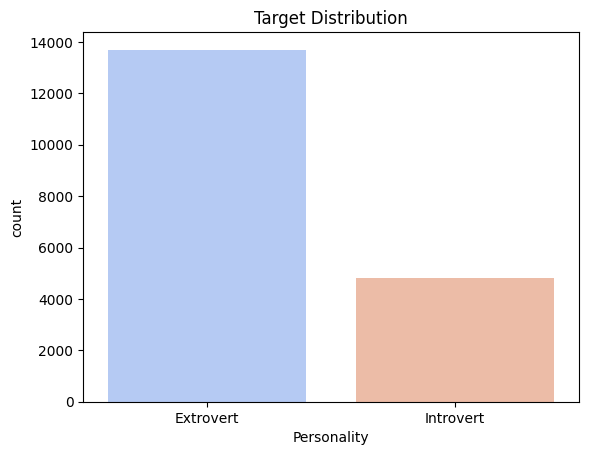

In [6]:
sns.countplot(data=X, x=y, palette='coolwarm', hue=y)
plt.title("Target Distribution")
plt.show()

In [7]:
num_col = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_col)

['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [8]:
cat_col = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(cat_col)

['Stage_fear', 'Drained_after_socializing']


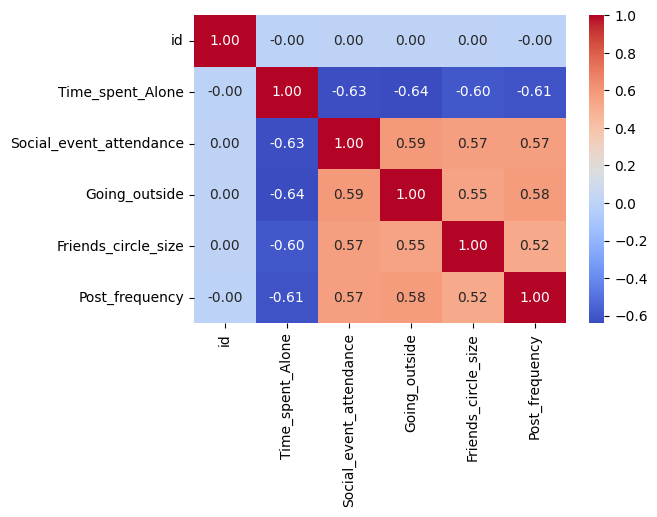

In [9]:
corr_matrix = X[num_col].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()



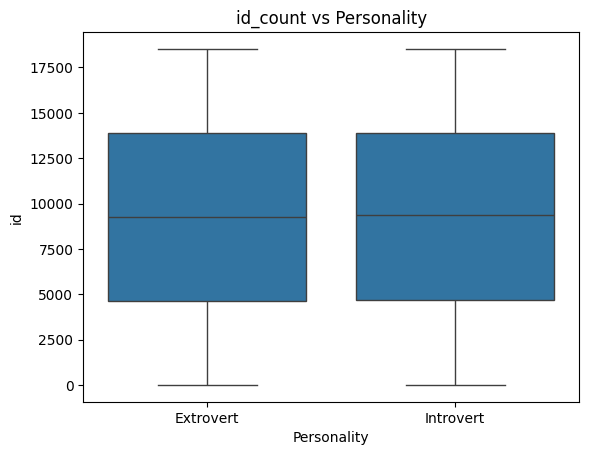

In [10]:
sns.boxplot(data=X, x=y, y='id')
plt.title(f"id_count vs Personality")
plt.show()

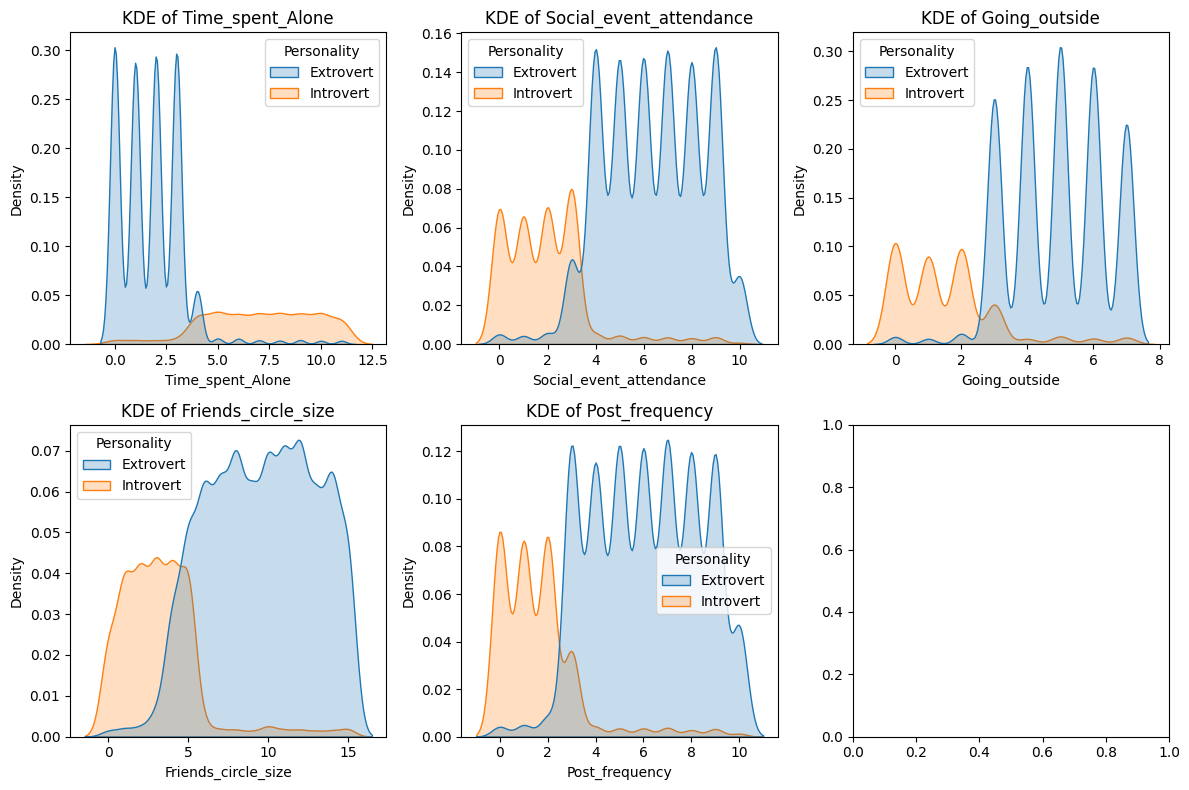

In [11]:
import math
eda_df = train.drop(columns=['id'])

n = len(num_col[1:]) 
rows = math.ceil(n/3)
fig, axes = plt.subplots(rows, 3, figsize=(12, rows*4))

axes = axes.flatten()

for i, col in enumerate(num_col[1:]):
    sns.kdeplot(data=eda_df, x=col, hue='Personality', fill=True, ax=axes[i])
    axes[i].set_title(f"KDE of {col}")
    

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(train['Personality'])

for col in cat_col:
    X[col] = le.fit_transform(X[col])

X = X.drop(columns=['id'])



In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [14]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


y_pred = model_dt.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
class_rep_dt = classification_report(y_test, y_pred)

print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score:   {macro_f1:.4f}")
print("\nClassification Report:\n", class_rep_dt)



Balanced Accuracy: 0.9001
Macro F1-score:   0.8994

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2753
           1       0.85      0.85      0.85       952

    accuracy                           0.92      3705
   macro avg       0.90      0.90      0.90      3705
weighted avg       0.92      0.92      0.92      3705



In [15]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)


model_rf.fit(X_train, y_train)


y_pred = model_rf.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
class_rep_rf = classification_report(y_test, y_pred)

print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score:   {macro_f1:.4f}")
print("\nClassification Report:\n", class_rep_rf)


Balanced Accuracy: 0.9542
Macro F1-score:   0.9573

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705



In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

bal_acc = balanced_accuracy_score(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
class_rep_rf = classification_report(y_test, y_pred)

print(f"Balanced Accuracy: {bal_acc:.4f}")
print(f"Macro F1-score:   {macro_f1:.4f}")
print("\nClassification Report:\n", class_rep_rf)


Balanced Accuracy: 0.9542
Macro F1-score:   0.9573

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.95      0.96      3705
weighted avg       0.97      0.97      0.97      3705

